### Tarea 3. Física computacional

#### Laura Sofía Arango
#### CC. 1152471978

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numpy.random import uniform
import scipy


#### Punto 1

Se tiene una espira con radio $a$ por la cúal circula una corriente $I$. Calcule la componente del potencial en un punto $P$ a una ditancia $r$ en términos de las siguientes integrales:

$$
A_{\phi}(r, \theta)=\frac{\mu_{0}}{4 \pi} \frac{4 I a}{\sqrt{a^{2}+r^{2}+2 a r \sin \theta}}\left[\frac{\left(2-k^{2}\right) K(k)-2 E(k)}{k 2}\right]
$$

Con $K(k)=\int_{0}^{\pi / 2} \frac{d \phi}{\sqrt{1-k^{2} \sin ^{2} \phi}}$, $E(k)=\int_{0}^{\pi / 2} \sqrt{1-k^{2} \sin ^{2} \phi} d \phi$ y $k^{2}=\frac{4 a r \sin \theta}{a^{2}+r^{2}+2 a r \sin \theta}$

In [5]:
#Montecarlo
def M(f,a,b,N=10000):
    
    x=np.zeros(N)
    y=np.zeros(N)
    for i in range(N):
        x[i]=uniform(a,b)
    
    integral=0.0
    for i in range(0,N):
        integral += f(x[i])
    ans = ((b-a)/float(N))*integral

    return(ans)



In [7]:
# a) para r=1 y theta variable

theta=np.linspace(0,np.pi,100)

def AN(t):
    r=1
    a=1
    I=3
    A=np.zeros(100)
    for i in range (0,len(t)):
        # calculamos k cuadrado para diferentes tetas
        k=(4*a*r*np.sin(t[i]))/(a*a+r*r+2*a*r*np.sin(t[i]))
        # calculamos K para cada k cuadrado
        Ki=M(lambda x:1/np.sqrt(1-k*np.sin(x)**2),0,np.pi/2)
        # calculamos E para cada k cuadrado
        Ei=M(lambda x:np.sqrt(1-k*np.sin(x)**2),0,np.pi/2)
        
        Ai=(4*I*a)/(np.sqrt(a*a+r*r+2*a*r*np.sin(t[i])))*(((2-k)*Ki-2*Ei)/(k))
        A[i]=Ai
    return A
           

/tmp/ipykernel_18843/513215824.py:18: RuntimeWarning: invalid value encountered in double_scalars
  Ai=(4*I*a)/(np.sqrt(a*a+r*r+2*a*r*np.sin(t[i])))*(((2-k)*Ki-2*Ei)/(k))


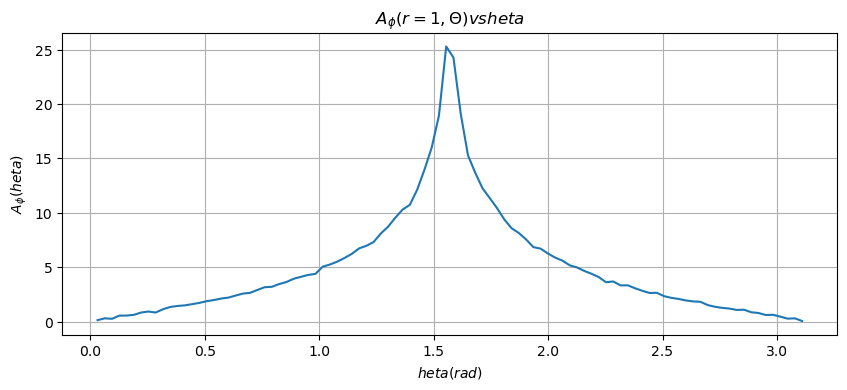

In [8]:
At=AN(theta)
plt.figure(dpi=100,figsize=[10,4])
plt.title('$A_{\phi}(r=1, \Theta)vs \Theta $')
plt.grid()
plt.xlabel('$\Theta (rad)$')
plt.ylabel('$A_{\phi}(\Theta)$')
plt.plot(theta[0:len(At)-1:],At[0:len(At)-1:])
plt.show()

In [9]:
# b) Para teta = pi/3 y ri variable

r=np.linspace(0,10,1000)

def Ar(r):
    t=np.pi/3
    a=1
    I=3
    A=np.zeros(len(r))
    for i in range (0,len(r)):
        # calculamos k cuadrado para diferentes tetas
        k=(4*a*r[i]*np.sin(t))/(a*a+r[i]**2+2*a*r[i]*np.sin(t))
        # calculamos K para cada k cuadrado
        Ki=M(lambda x:1/np.sqrt(1-k*np.sin(x)**2),0,np.pi/2,N=10000)
        # calculamos E para cada k cuadrado
        Ei=M(lambda x:np.sqrt(1-k*np.sin(x)**2),0,np.pi/2,N=10000)
        
        Ai=(4*I*a)/(np.sqrt(a*a+r[i]**2+2*a*r[i]*np.sin(t)))*(((2-k)*Ki-2*Ei)/(k))
        A[i]=Ai
    return A
    

/tmp/ipykernel_18843/3640247601.py:18: RuntimeWarning: invalid value encountered in double_scalars
  Ai=(4*I*a)/(np.sqrt(a*a+r[i]**2+2*a*r[i]*np.sin(t)))*(((2-k)*Ki-2*Ei)/(k))


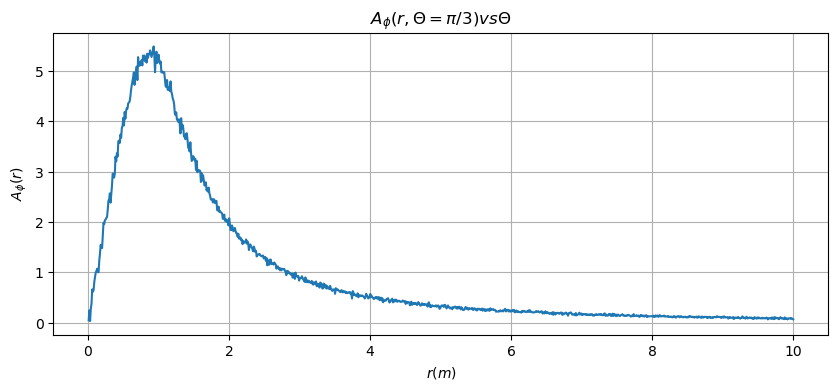

In [220]:
AR=Ar(r)
plt.figure(dpi=100,figsize=[10,4])
plt.title('$A_{\phi}(r, \Theta=\pi /3) vs \Theta $')
plt.grid()
plt.xlabel('$r(m)$')
plt.ylabel('$A_{\phi}(r)$')
plt.plot(r,AR)
plt.show()

### Punto 2

El primer método de estimación de $\pi$ con números aleatorios es el método simple. Donde se considera una cuadrado de lado $L$,con una circunferencia circunscrita de radio $L$. Se pueden relacionar las áreas tal que:

$$
\frac{A_{circunferencia}}{A_{cuadrado}}=\frac{\pi L²}{L²}
$$
La relación puede estar dada por 

In [14]:
#Método simple
def simple(n,t):
#n número de repeticiones
#t número de lanzamientos
    save=np.zeros(n)
    for j in range(n):
        ac=0
        for i in range(t):
            x=uniform(-1,1)
            y=uniform(-1,1)
            if x**2+y**2 <1:
                ac=ac+1
        save[j]=(4*(ac/t))
    return save


Se tiene el método de Buffon que se basa en contar las veces que agujas de la misma longitud $l$ lanzadas aleatoriamente se cruzan con la líneas de una malla vertical con separación de $l$.

La probabilidad de que esto ocurra está dada por :
$$
P=\frac{2}{\pi}
$$

In [15]:
# Método de Buffon
def Buffon(n,l,d):
    #n: número de pasos
    #d: número de divisiones del grid
    #l: longitud aguja, separación líneas grid
    a=0
    grid=np.arange(-l*d,l*d+l,l)
    for i in range(n):
        #generamos un número aleatorio en el grid
        xi=uniform(-l*d,l*d)
        #generamos un ángulo desde el 0 hasta 90 grados
        theta=uniform(0,np.pi/2)
        # a partir del número aleatorio generamos la aguja 
        up=xi+l*np.cos(theta)
        
        #pasamos las dos coordenadas por el grid
        for j in grid:
            if xi<j and up>j:
                a=a+1
    P=a/n 
    return (2/P)
print(Buffon(10000,2,10))

3.144654088050314


Se tiene el método de Buffon-Laplace donde introducimos un grid horizontal y la probabilidad está dada por :
$$
P=\frac{4}{\pi}
$$

In [17]:
#Método de Buffon-Laplace
def Buffon_Laplace(n,l,d):
    #n: número de pasos
    #d: número de divisiones del grid
    #l: longitud aguja, separación líneas grid
    a=0
    grid=np.arange(-l*d,l*d+l,l)
    for i in range(n):
        #generamos un número aleatorio en el grid
        xi=uniform(-l*d,l*d)
        #generamos un ángulo desde el 0 hasta 90 grados
        theta=uniform(0,np.pi/2)
        # a partir del número aleatorio generamos la aguja 
        y=xi+l*np.sin(theta)
        x=xi+l*np.cos(theta)
        
        #pasamos las dos coordenadas por el grid
        for j in grid:
            if xi<j and x>j:
                a=a+1
            if xi<j and y>j:
                a=a+1
                
    P=a/n 
    return (4/P)

In [18]:
print(Buffon_Laplace(10000,2,10))

3.1560675398453526


### Verificación de resultados

#### Verificación del teorema del límite central
Para el método simple se verifica para 100 y 3000 repeticiones con 100000 lanzamientos y para 3000 repeticiones con 1000000 lanzamientos. 
Sin embargo el tiempo de computo en este caso mostró ser demasiado elevado, entonces se toman: 

1. 100 repeticiones, 10000 lanzamientos

2. 1000 repeticiones, 10000 lanzamientos

3. 1000 repeticiones, 100000 lanzamientos

In [20]:
s1=simple(100,10000)

In [22]:
s2=simple(1000,10000)

In [29]:
s3=simple(1000,100000)

3.140916


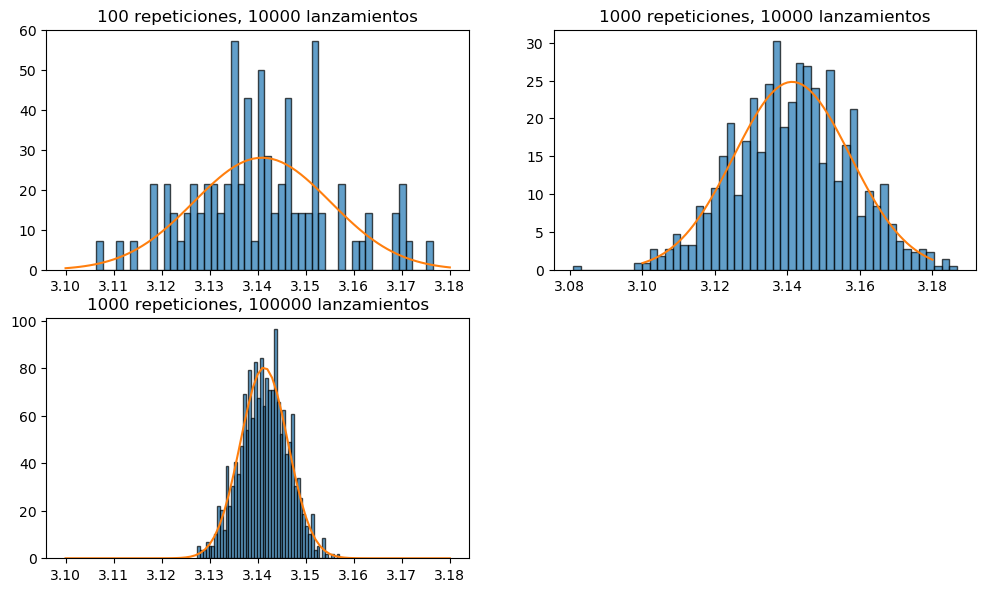

In [216]:
m1=np.mean(s1)
print(m1)
std1=np.std(s1)

x=np.arange(3.1,3.18,0.001)

plt.figure(dpi=100,figsize=([12,7]))
ax1 = plt.subplot(2,2,1)

ax1.hist(s1,bins=50,alpha = 0.7,edgecolor='black',density=True)
ax1.set_title('100 repeticiones, 10000 lanzamientos')
ax1.plot(x,scipy.stats.norm.pdf(x, m1, std1))

ax2 = plt.subplot(2,2,2)

ax2.hist(s2,bins=50,alpha = 0.7,edgecolor='black',density=True)
ax2.set_title('1000 repeticiones, 10000 lanzamientos')
ax2.plot(x,scipy.stats.norm.pdf(x, np.mean(s2), np.std(s2)))

ax3 = plt.subplot(2,2,3)
ax3.hist(s3,bins=50,alpha = 0.7,edgecolor='black',density=True)
ax3.set_title('1000 repeticiones, 100000 lanzamientos')
ax3.plot(x,scipy.stats.norm.pdf(x, np.mean(s3), np.std(s3)))
plt.show()

### Verificación del teorema de números grandes
Verificamos el valor obtenido con los métodos de Buffon y de Buffon-Laplace con el de la librería Numpy 

In [151]:
num=np.arange(100,1e6,35000)

In [118]:
num=np.arange(100,1e6,35000)
Bf=np.zeros(len(num))
B=np.zeros(len(num))
for i in range(len(num)):
    Bf[i]=Buffon_Laplace(int(num[i]),2,10)
    B[i]=Buffon(int(num[i]),2,10)
    #print(B[i])

3.571428571428571
3.1540638900121314
3.1509866498853776
3.130538387072753
3.1375974200483743
3.134734505352859
3.1364294564617015
3.1410190690998565
3.1492433271120506
3.1422801725212532
3.142700693889642
3.1459205554988254
3.1490573816573595
3.1382960383408616
3.1411129448334427
3.1419972116345445
3.136110908917843
3.1419942767235827
3.1483827126257595
3.1414057684541645
3.150084590187538
3.139366788309478
3.141303594082063
3.138944393001608
3.14274010575558
3.1407975278467175
3.1407559762709174
3.1436164728031106
3.1412555407055565


Comparamos los errores de ambos métodos

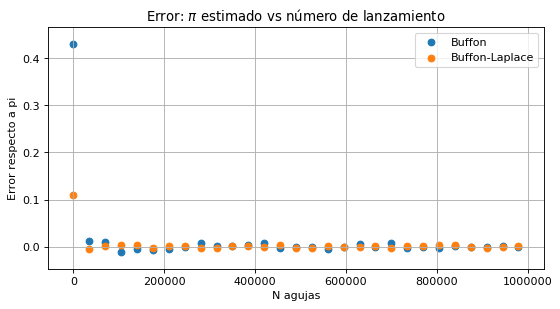

In [123]:
plt.figure(figsize=[8,4],dpi=80)
plt.scatter(num,B-np.pi,label='Buffon')
plt.scatter(num,Bf-np.pi,label='Buffon-Laplace')
plt.title('Error: $\pi$ estimado vs número de lanzamiento')
plt.xlabel('N agujas')
plt.ylabel('Error respecto a pi')
plt.grid()
plt.legend()
plt.show()

In [135]:
x=np.arange(1,11,1)
val=(100,500,1000,1500,5000,10000)

a1=np.zeros(len(val))
a2=np.zeros(len(val))
a3=np.zeros(len(val))
a4=np.zeros(len(val))
a5=np.zeros(len(val))
a6=np.zeros(len(val))
a7=np.zeros(len(val))
a8=np.zeros(len(val))
a9=np.zeros(len(val))
a10=np.zeros(len(val))

np.random.seed(1)
for j in range(len(val)):
    a1[j]=Buffon(val[j],2,10)

np.random.seed(2)
for j in range(len(val)):
    a2[j]=Buffon(val[j],2,10)
    
np.random.seed(3)
for j in range(len(val)):
    a3[j]=Buffon(val[j],2,10)
    
np.random.seed(4)
for j in range(len(val)):
    a4[j]=Buffon(val[j],2,10)

np.random.seed(5)
for j in range(len(val)):
    a5[j]=Buffon(val[j],2,10)

np.random.seed(6)
for j in range(len(val)):
    a6[j]=Buffon(val[j],2,10)

np.random.seed(7)
for j in range(len(val)):
    a7[j]=Buffon(val[j],2,10)

np.random.seed(8)
for j in range(len(val)):
    a8[j]=Buffon(val[j],2,10)

np.random.seed(9)
for j in range(len(val)):
    a9[j]=Buffon(val[j],2,10)

np.random.seed(10)
for j in range(len(val)):
    a10[j]=Buffon(val[j],2,10)
    
plot=np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10])

Ahora vemos como se comporta Buffon para diferentes semillas.

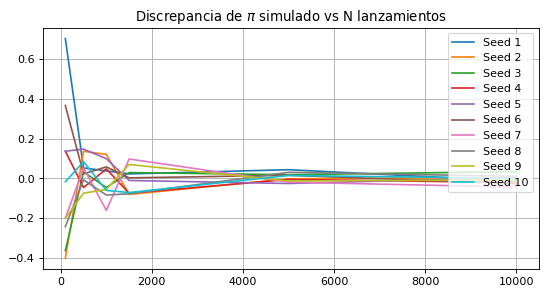

In [148]:
plt.figure(figsize=[8,4],dpi=80)
for i in range(len(plot)):
    plt.plot(val,plot[i]-np.pi,label=f'Seed {i+1}')


plt.title('Discrepancia de $\pi$ simulado vs N lanzamientos')
plt.legend()
plt.grid()    
plt.show()

Vemos que todas convergen a pi sin importar la semilla

Ahora veamos comparemos diferentes distribuciones a la hora de calcular los números aleatorios. Para esto vamos a definir Buffon normal y Buffon exponencial.

In [163]:
def Buffon_g(n,l,d):
    #n: número de pasos
    #d: número de divisiones del grid
    #l: longitud aguja, separación líneas grid
    a=0
    grid=np.arange(-l*d,l*d+l,l)
    for i in range(n):
        #generamos un número aleatorio en el grid
        xi=np.random.normal(0.27,0.5)
        #generamos un ángulo desde el 0 hasta 90 grados
        theta=uniform(0,np.pi/2)
        # a partir del número aleatorio generamos la aguja 
        up=xi+l*np.cos(theta)
        
        #pasamos las dos coordenadas por el grid
        for j in grid:
            if xi<j and up>j:
                a=a+1
    P=a/n 
    return (2/P)
def Buffon_exp(n,l,d):
    #n: número de pasos
    #d: número de divisiones del grid
    #l: longitud aguja, separación líneas grid
    a=0
    grid=np.arange(-l*d,l*d+l,l)
    for i in range(n):
        #generamos un número aleatorio en el grid
        
        xi=np.random.exponential(0.42)
        #generamos un ángulo desde el 0 hasta 90 grados
        theta=uniform(0,np.pi/2)
        # a partir del número aleatorio generamos la aguja 
        up=xi+l*np.cos(theta)
        
        #pasamos las dos coordenadas por el grid
        for j in grid:
            if xi<j and up>j:
                a=a+1
    P=a/n 
    return (2/P)

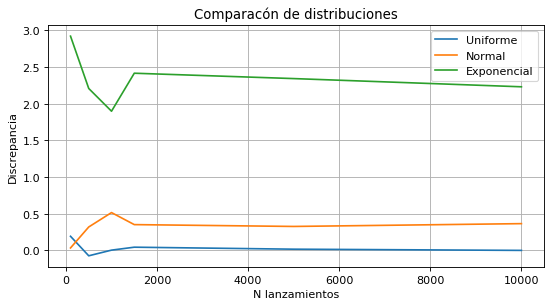

In [168]:
uni=np.zeros(len(val))
norm=np.zeros(len(val))
expo=np.zeros(len(val))


for i in range(len(val)):
    uni[i]=Buffon(val[i],2,10)
    norm[i]=Buffon_g(val[i],2,10)
    expo[i]=Buffon_exp(val[i],2,10)

plt.figure(figsize=[8,4],dpi=80)    
plt.plot(val,uni-np.pi,label='Uniforme')
plt.plot(val,norm-np.pi,label='Normal')
plt.plot(val,expo-np.pi,label='Exponencial')
plt.title('Comparacón de distribuciones')
plt.legend()
plt.ylabel('Discrepancia')
plt.xlabel('N lanzamientos')
plt.grid()
plt.show()

Se puede hacer una estimación por el método simple con las diferentes distribuciones:

In [210]:
def simple_n(n,t):
#n número de repeticiones
#t número de lanzamientos
    save=np.zeros(n)
    for j in range(n):
        ac=0
        for i in range(t):
            x=np.random.normal(0.27,0.5)
            y=np.random.normal(0.27,0.5)
            if x**2+y**2 <1:
                ac=ac+1
        save[j]=(4*(ac/t))
    return save

def simple_exp(n,t):
#n número de repeticiones
#t número de lanzamientos
    save=np.zeros(n)
    for j in range(n):
        ac=0
        for i in range(t):
            x=np.random.exponential(0.42)
            y=np.random.exponential(0.42)
            if x**2+y**2 <1:
                ac=ac+1
        save[j]=(4*(ac/t))
    return save

Calculamos 100 repeticiones, 10000 lanzamientos.

In [211]:
s_g=simple_n(100,10000)
s_exp=simple_n(100,10000)

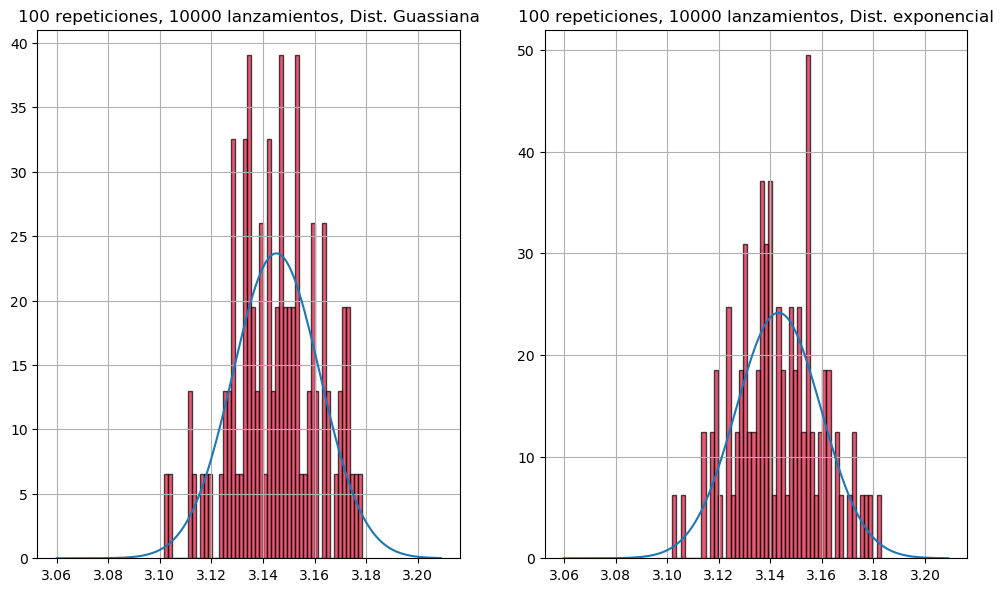

In [219]:
x=np.arange(3.06,3.21,0.001)

plt.figure(dpi=100,figsize=([12,7]))
ax1 = plt.subplot(1,2,1)
ax1.hist(s_g,bins=50,alpha = 0.7,edgecolor='black',color='crimson',density=True)
ax1.plot(x,scipy.stats.norm.pdf(x, np.mean(s_g), np.std(s_g)))
ax1.set_title('100 repeticiones, 10000 lanzamientos, Dist. Guassiana')
plt.grid()

ax2 = plt.subplot(1,2,2)
ax2.hist(s_exp,bins=50,alpha = 0.7,edgecolor='black',color='crimson',density=True)
ax2.plot(x,scipy.stats.norm.pdf(x, np.mean(s_exp), np.std(s_exp)))
ax2.set_title('100 repeticiones, 10000 lanzamientos, Dist. exponencial')

plt.grid()
plt.show()

Comprobemos el teorema de límite central para Buffon y Buffon-Laplace:

Se tomarán 200 repeticiones y N=10000 por cuestiones de eficiencia computacional.


In [195]:
save_b=np.zeros(200)
save_bl=np.zeros(200)
for i in range(200):
    save_b[i]=Buffon(10000,2,10)
    save_bl[i]=Buffon_Laplace(10000,2,10)    

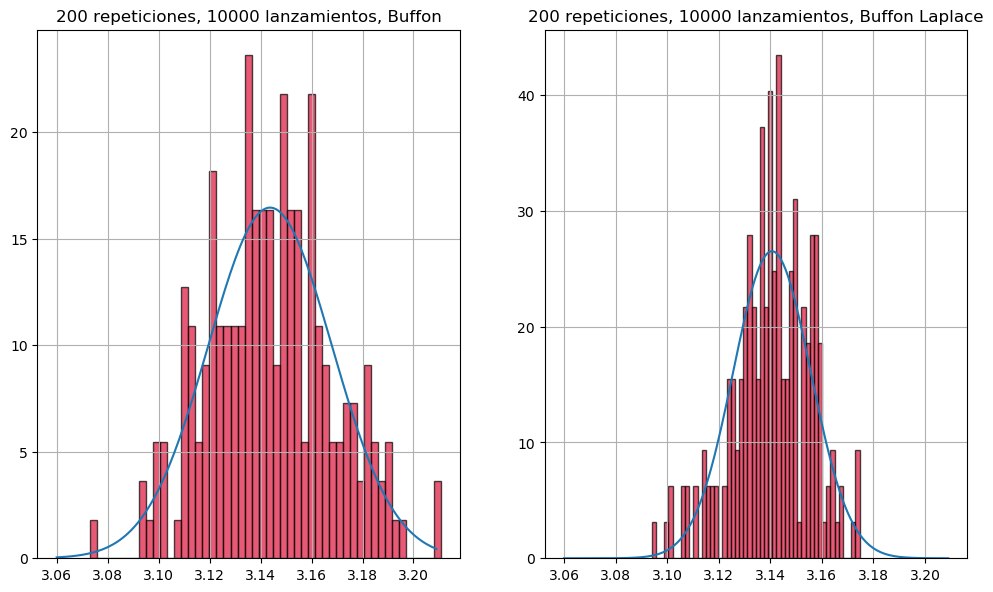

In [215]:
x=np.arange(3.06,3.21,0.001)

plt.figure(dpi=100,figsize=([12,7]))
ax1 = plt.subplot(1,2,1)
ax1.hist(save_b,bins=50,alpha = 0.7,edgecolor='black',color='crimson',density=True)
ax1.plot(x,scipy.stats.norm.pdf(x, np.mean(save_b), np.std(save_b)))
ax1.set_title('200 repeticiones, 10000 lanzamientos, Buffon')
plt.grid()

ax2 = plt.subplot(1,2,2)
ax2.hist(save_bl,bins=50,alpha = 0.7,edgecolor='black',color='crimson',density=True)
ax2.plot(x,scipy.stats.norm.pdf(x, np.mean(save_bl), np.std(save_bl)))
ax2.set_title('200 repeticiones, 10000 lanzamientos, Buffon Laplace')

plt.grid()
plt.show()